In [1]:
import os
import pandas as pd
from scipy.stats import spearmanr, kendalltau
from datetime import datetime

# Función para calcular las correlaciones de Spearman y Kendall
def calculate_correlations(original_data, imputed_data):
    spearman_corr, _ = spearmanr(original_data, imputed_data)
    kendall_corr, _ = kendalltau(original_data, imputed_data)
    return spearman_corr, kendall_corr

# Ruta al directorio base donde se encuentran las carpetas de cada técnica
base_directory = r"C:\Users\hctrl\OneDrive\Tesis\Experimento\Temperatura Mínima\Vacios Aleatorios"

# Carga de los datos originales
original_data_path = r"C:\\Users\\hctrl\\OneDrive\\Tesis\\Experimento\\Temperatura Mínima\\TempMin.csv"
original_data = pd.read_csv(original_data_path)

# Conversión de la fecha a formato datetime y establecer como índice
original_data['Fecha'] = pd.to_datetime({'year': original_data['Anio'], 'month': original_data['Mes'], 'day': original_data['Dia']})
original_data.set_index('Fecha', inplace=True)

# Fechas de los datos imputados
missing_dates = [
    datetime(1997, 12, 16), datetime(1998, 1, 24), datetime(1998, 2, 1), datetime(1999, 11, 22),
    datetime(2002, 10, 4), datetime(2003, 3, 28), datetime(2003, 5, 14), datetime(2003, 8, 23),
    datetime(2004, 4, 19), datetime(2005, 9, 10), datetime(2005, 10, 8), datetime(2006, 1, 2),
    datetime(2006, 4, 4), datetime(2006, 11, 6), datetime(2007, 2, 14)
]

# Preparar un DataFrame para guardar los resultados
correlation_results = []

# Diccionario para los nombres de las carpetas
technique_folders = {
    'Hot_Deck': 'Resultados_Imputacion_Hot_Deck',
    'IDW': 'Resultados_Imputacion_IDW',
    'KNN': 'Resultados_Imputacion_KNN',
    'Razon_Normal': 'Resultados_Imputacion_Razon_Normal',
    'WKNNI': 'Resultados_Imputacion_WKNNI',
    'ID': 'Resultados_Imputados_ID'
}

# Iterar sobre las carpetas de técnicas de imputación
for technique, folder_name in technique_folders.items():
    technique_path = os.path.join(base_directory, folder_name)
    
    # Iterar sobre los archivos CSV de imputación dentro de cada técnica
    for i in range(1, 16):
        file_name = f'TempMin_imputado_{technique}_{i + 1}.csv'
        file_path = os.path.join(technique_path, file_name)
    
        # Verificar si el archivo existe
        if os.path.isfile(file_path):
            # Carga de los datos imputados
            imputed_data = pd.read_csv(file_path)
            imputed_data['Fecha'] = pd.to_datetime({'year': imputed_data['Anio'], 'month': imputed_data['Mes'], 'day': imputed_data['Dia']})
            imputed_data.set_index('Fecha', inplace=True)

            # Filtrar los datos originales y los imputados solo para la ID_CIDERH "M_015_A_II"
            original_sub = original_data[original_data['ID_CIDERH'] == 'M_015_A_II']
            imputed_sub = imputed_data[imputed_data['ID_CIDERH'] == 'M_015_A_II']

            # Filtrar los datos por las fechas específicas de datos faltantes
            original_missing = original_sub.loc[missing_dates]
            imputed_missing = imputed_sub.loc[missing_dates]

            # Calcular las correlaciones
            spearman_corr, kendall_corr = calculate_correlations(original_missing['TEMP_MIN_RBE'], imputed_missing['TEMP_MIN_RBE'])

            # Agregar los resultados a la lista
            correlation_results.append({
                'Technique': technique,
                'File': file_name,
                'Spearman': spearman_corr,
                'Kendall': kendall_corr
            })

# Convertir la lista de resultados en un DataFrame
correlation_results_df = pd.DataFrame(correlation_results)

# Guardar los resultados en un archivo CSV
results_csv_path = os.path.join(base_directory, 'correlations_results.csv')
correlation_results_df.to_csv(results_csv_path, index=False)

# Imprimir los resultados
print(correlation_results_df)

   Technique                             File  Spearman   Kendall
0   Hot_Deck  TempMin_imputado_Hot_Deck_2.csv  1.000000  1.000000
1   Hot_Deck  TempMin_imputado_Hot_Deck_3.csv  1.000000  1.000000
2   Hot_Deck  TempMin_imputado_Hot_Deck_4.csv  0.984588  0.954327
3   Hot_Deck  TempMin_imputado_Hot_Deck_5.csv  0.984588  0.954327
4   Hot_Deck  TempMin_imputado_Hot_Deck_6.csv  0.986401  0.954327
..       ...                              ...       ...       ...
79        ID       TempMin_imputado_ID_11.csv  0.820575  0.696733
80        ID       TempMin_imputado_ID_12.csv  0.859482  0.732997
81        ID       TempMin_imputado_ID_13.csv  0.858714  0.729498
82        ID       TempMin_imputado_ID_14.csv  0.855114  0.729498
83        ID       TempMin_imputado_ID_15.csv  0.855114  0.729498

[84 rows x 4 columns]


In [2]:
import pandas as pd

df = pd.read_csv("correlations_results.csv")

# Calcular estadísticas descriptivas para Spearman y Kendall por técnica
descriptive_stats_spearman = df.groupby('Technique')['Spearman'].describe()
descriptive_stats_kendall = df.groupby('Technique')['Kendall'].describe()

# Calcular el IQR para Spearman y Kendall
descriptive_stats_spearman['IQR'] = descriptive_stats_spearman['75%'] - descriptive_stats_spearman['25%']
descriptive_stats_kendall['IQR'] = descriptive_stats_kendall['75%'] - descriptive_stats_kendall['25%']

# Medidas adicionales de Kurtosis y Skewness
descriptive_stats_spearman['Kurtosis'] = df.groupby('Technique')['Spearman'].apply(pd.Series.kurtosis)
descriptive_stats_spearman['Skewness'] = df.groupby('Technique')['Spearman'].skew()
descriptive_stats_kendall['Kurtosis'] = df.groupby('Technique')['Kendall'].apply(pd.Series.kurtosis)
descriptive_stats_kendall['Skewness'] = df.groupby('Technique')['Kendall'].skew()

print(descriptive_stats_spearman)
print(descriptive_stats_kendall)

              count      mean       std       min       25%       50%  \
Technique                                                               
Hot_Deck       14.0  0.904075  0.078599  0.784904  0.851115  0.873169   
ID             14.0  0.843531  0.099928  0.685357  0.776138  0.854574   
IDW            14.0  0.771539  0.129168  0.642033  0.691292  0.718033   
KNN            14.0  0.843160  0.101297  0.685357  0.768275  0.851347   
Razon_Normal   14.0  0.262011  0.345297 -0.333044  0.083842  0.314165   
WKNNI          14.0  0.875143  0.092449  0.753847  0.802457  0.845445   

                   75%      max       IQR  Kurtosis  Skewness  
Technique                                                      
Hot_Deck      0.984588  1.00000  0.133473 -1.718795  0.018840  
ID            0.859290  1.00000  0.083152 -0.544071  0.235335  
IDW           0.821850  0.99637  0.130558 -0.445779  1.030111  
KNN           0.856914  1.00000  0.088639 -0.571354  0.174915  
Razon_Normal  0.485832  0.85118

<Figure size 800x400 with 0 Axes>

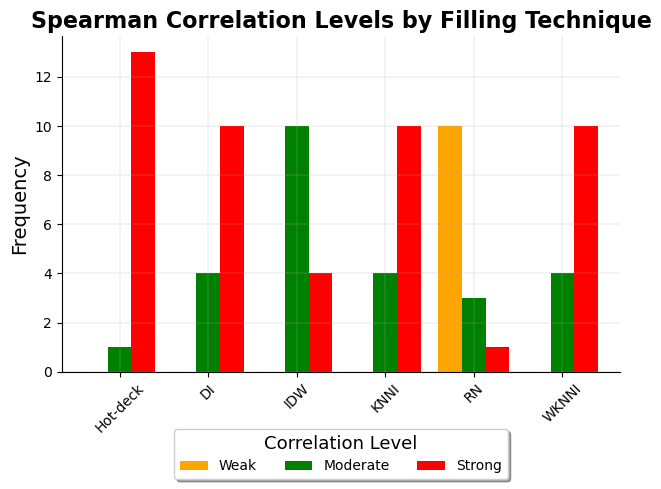

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("correlations_results.csv")

# Correlaciones de spearman
#correlation_results_df['Spearman_Cat'] = pd.cut(correlation_results_df['Spearman'], bins=[0, 0.3, 0.6, 1], labels=['Weak', 'Moderate', 'Strong'])

correlation_results_df['Spearman_Cat'] = pd.cut(correlation_results_df['Spearman'], bins=[-np.inf, 0.5, 0.8, np.inf], labels=['Weak', 'Moderate', 'Strong'])

spearman_cat_counts = correlation_results_df.groupby(['Technique', 'Spearman_Cat']).size().unstack().fillna(0)

technique_names = {'Hot_Deck': 'Hot-deck', 'IDW': 'IDW', 'KNN': 'KNNI', 'Razon_Normal': 'RN', 'WKNNI': 'WKNNI', 'ID': 'DI'}
spearman_cat_counts.rename(index=technique_names, inplace=True)

# Plot
plt.figure(figsize=(8, 4))
spearman_cat_counts.plot(kind='bar', stacked=False, color=['orange', 'green', 'red'], width=0.8)
plt.title('Spearman Correlation Levels by Filling Technique', fontsize=16, fontweight='bold')
plt.xlabel('Filling Techniques', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45) 

plt.tight_layout()  
plt.grid(linestyle='-', linewidth=0.2)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(title='Correlation Level', fontsize=10, title_fontsize='13', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)
plt.show()

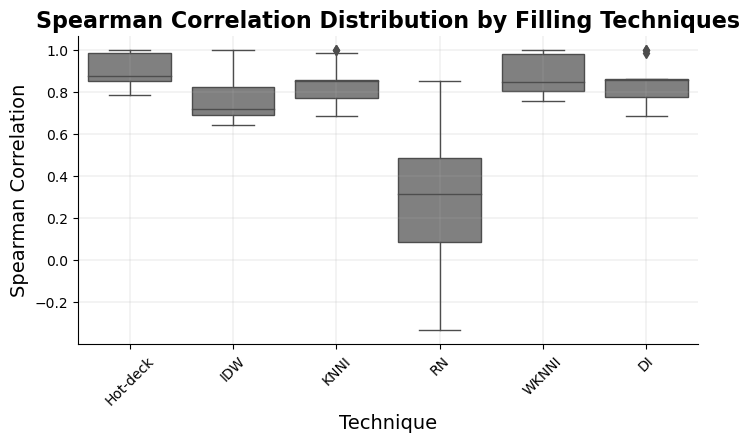

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("correlations_results.csv")

plt.figure(figsize=(8, 4))
boxplot = sns.boxplot(x='Technique', y='Spearman', data=df, color='gray', linewidth=1)

technique_names = ['Hot-deck', 'IDW', 'KNNI', 'RN', 'WKNNI', 'DI']

boxplot.set_xticklabels(technique_names)

plt.title('Spearman Correlation Distribution by Filling Techniques', fontsize=16, fontweight='bold')
plt.xlabel('Technique', fontsize=14)
plt.ylabel('Spearman Correlation', fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.grid(linestyle='-', linewidth=0.2)
sns.despine()
plt.show()

<Figure size 800x400 with 0 Axes>

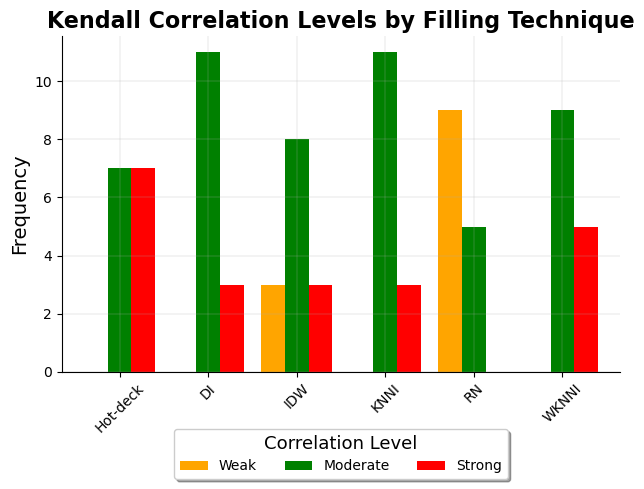

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

correlation_results_df = pd.read_csv("correlations_results.csv")

# Kendall correlation categorization
correlation_results_df['Kendall_Cat'] = pd.cut(correlation_results_df['Kendall'], bins=[-np.inf, 0.5, 0.8, np.inf], labels=['Weak', 'Moderate', 'Strong'])

kendall_cat_counts = correlation_results_df.groupby(['Technique', 'Kendall_Cat']).size().unstack().fillna(0)

technique_names = {'Hot_Deck': 'Hot-deck', 'IDW': 'IDW', 'KNN': 'KNNI', 'ID': 'DI', 'Razon_Normal': 'RN', 'WKNNI': 'WKNNI'}
kendall_cat_counts.rename(index=technique_names, inplace=True)

# Plot
plt.figure(figsize=(8, 4))
kendall_cat_counts.plot(kind='bar', stacked=False, color=['orange', 'green', 'red'], width=0.8)
plt.title('Kendall Correlation Levels by Filling Technique', fontsize=16, fontweight='bold')
plt.xlabel('Filling Techniques', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.grid(linestyle='-', linewidth=0.2)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(title='Correlation Level', fontsize=10, title_fontsize='13', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)

# Display plot
plt.show()

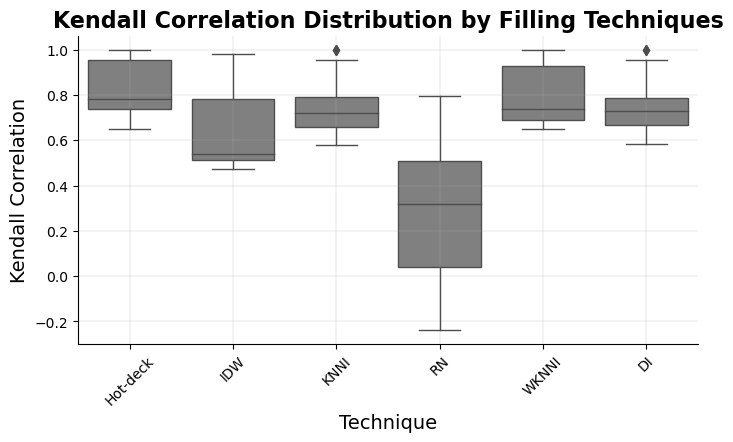

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("correlations_results.csv")

plt.figure(figsize=(8, 4))
boxplot = sns.boxplot(x='Technique', y='Kendall', data=df, color='gray', linewidth=1)

technique_names = ['Hot-deck', 'IDW', 'KNNI', 'RN', 'WKNNI', 'DI']

boxplot.set_xticklabels(technique_names)

plt.title('Kendall Correlation Distribution by Filling Techniques', fontsize=16, fontweight='bold')
plt.xlabel('Technique', fontsize=14)
plt.ylabel('Kendall Correlation', fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.grid(linestyle='-', linewidth=0.2)
sns.despine()
plt.show()

In [1]:
import os
import pandas as pd
from datetime import datetime

# Función para calcular los errores residuales
def calculate_residual_errors(original_data, imputed_data):
    return (original_data - imputed_data).abs()

# Ruta al directorio base donde se encuentran las carpetas de cada técnica
base_directory = r"C:\Users\hctrl\OneDrive\Tesis\Experimento\Temperatura Mínima\Vacios Aleatorios"

# Carga de los datos originales
original_data_path = r"C:\Users\hctrl\OneDrive\Tesis\Experimento\Temperatura Mínima\TempMin.csv"
original_data = pd.read_csv(original_data_path)
original_data['Fecha'] = pd.to_datetime({'year': original_data['Anio'], 'month': original_data['Mes'], 'day': original_data['Dia']})
original_data.set_index('Fecha', inplace=True)

#filtrar los datos originales para la ID_CIDERH "M_015_A_II"
original_data = original_data[original_data['ID_CIDERH'] == 'M_015_A_II']

# Fechas de los datos imputados como datetime objects
missing_dates = [
    datetime(1997, 12, 16), datetime(1998, 1, 24), datetime(1998, 2, 1), datetime(1999, 11, 22),
    datetime(2002, 10, 4), datetime(2003, 3, 28), datetime(2003, 5, 14), datetime(2003, 8, 23),
    datetime(2004, 4, 19), datetime(2005, 9, 10), datetime(2005, 10, 8), datetime(2006, 1, 2),
    datetime(2006, 4, 4), datetime(2006, 11, 6), datetime(2007, 2, 14)
]

# Preparar un DataFrame para guardar los errores residuales
residuals_results = []

# Diccionario para los nombres de las carpetas
technique_folders = {
    'Hot_Deck': 'Resultados_Imputacion_Hot_Deck',
    'IDW': 'Resultados_Imputacion_IDW',
    'KNN': 'Resultados_Imputacion_KNN',
    'Razon_Normal': 'Resultados_Imputacion_Razon_Normal',
    'WKNNI': 'Resultados_Imputacion_WKNNI',
    'ID': 'Resultados_Imputados_ID'
}

# Iterar sobre las carpetas de técnicas de imputación
for technique, folder_name in technique_folders.items():
    technique_path = os.path.join(base_directory, folder_name)
    
    # Iterar sobre los archivos CSV de imputación dentro de cada técnica
    for i in range(1, 16):
        file_name = f'TempMin_imputado_{technique}_{i + 1}.csv'
        file_path = os.path.join(technique_path, file_name)
    
        # Verificar si el archivo existe
        if os.path.isfile(file_path):
            # Carga de los datos imputados
            imputed_data = pd.read_csv(file_path)
            imputed_data['Fecha'] = pd.to_datetime({'year': imputed_data['Anio'], 'month': imputed_data['Mes'], 'day': imputed_data['Dia']})
            imputed_data.set_index('Fecha', inplace=True)

            # Filtrar los datos imputados solo para la ID_CIDERH "M_015_A_II"
            imputed_sub = imputed_data[imputed_data['ID_CIDERH'] == 'M_015_A_II']

            # Filtrar los datos por las fechas específicas de datos faltantes
            original_missing = original_data.loc[missing_dates]
            imputed_missing = imputed_sub.loc[missing_dates]

            # Calcular los errores residuales
            residual_errors = calculate_residual_errors(original_missing['TEMP_MIN_RBE'], imputed_missing['TEMP_MIN_RBE'])

            # Agregar los resultados a la lista
            residuals_results.append({
                'Technique': technique,
                'File': file_name,
                'Residual_Error': residual_errors.mean()  # Calculamos la media del error residual
            })

# Convertir la lista de errores residuales en un DataFrame
residuals_df = pd.DataFrame(residuals_results)

# Guardar los errores residuales en un archivo CSV
residuals_csv_path = os.path.join(base_directory, 'residuals_results.csv')
residuals_df.to_csv(residuals_csv_path, index=False)

# Calcular estadísticas descriptivas para los errores residuales
descriptive_stats_residuals = residuals_df.groupby('Technique')['Residual_Error'].describe()

# Calcular el IQR 
descriptive_stats_residuals['IQR'] = descriptive_stats_residuals['75%'] - descriptive_stats_residuals['25%']

# Agregar medidas de curtosis y asimetría
descriptive_stats_residuals['Kurtosis'] = residuals_df.groupby('Technique')['Residual_Error'].apply(pd.Series.kurtosis)
descriptive_stats_residuals['Skewness'] = residuals_df.groupby('Technique')['Residual_Error'].skew()

print(descriptive_stats_residuals)

              count      mean       std       min       25%       50%  \
Technique                                                               
Hot_Deck       14.0  1.191609  0.605835  0.281813  0.649601  1.301518   
ID             14.0  2.227818  1.099038  0.468969  1.346291  2.409119   
IDW            14.0  1.260258  0.538946  0.431027  0.871282  1.339172   
KNN            14.0  1.677999  0.836385  0.371333  0.998612  1.793784   
Razon_Normal   14.0  2.539417  1.160858  0.768893  1.512854  2.488412   
WKNNI          14.0  1.606255  0.881595  0.339035  0.746314  1.752694   

                   75%       max       IQR  Kurtosis  Skewness  
Technique                                                       
Hot_Deck      1.644414  2.081232  0.994813 -1.356839 -0.105421  
ID            3.225524  3.616747  1.879233 -1.364156 -0.293608  
IDW           1.667976  2.040798  0.796694 -1.238691 -0.171790  
KNN           2.405943  2.780489  1.407331 -1.397002 -0.205368  
Razon_Normal  3.417957  4

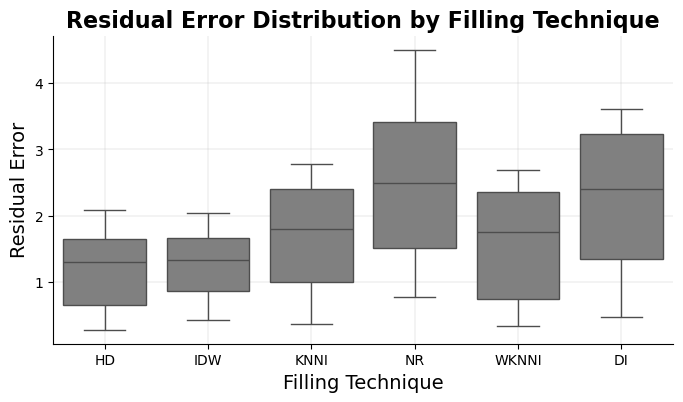

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reemplazo de los nombres de las técnicas
new_names = {
    'Hot_Deck': 'HD',
    'IDW': 'IDW',
    'KNN': 'KNNI',
    'ID': 'DI',
    'Razon_Normal': 'NR',
    'WKNNI': 'WKNNI'
}

residuals_df['Technique'] = residuals_df['Technique'].replace(new_names)

plt.figure(figsize=(8, 4))
sns.boxplot(x='Technique', y='Residual_Error', data=residuals_df, color='gray', linewidth=1)
plt.grid(linestyle='-', linewidth=0.2)
plt.title('Residual Error Distribution by Filling Technique', fontsize=16, fontweight='bold')
plt.xlabel('Filling Technique', fontsize=14)
plt.ylabel('Residual Error', fontsize=14)
sns.despine()

# Guarda la imagen en formato .eps
plt.savefig('residuals_plot.eps', format='eps', bbox_inches='tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


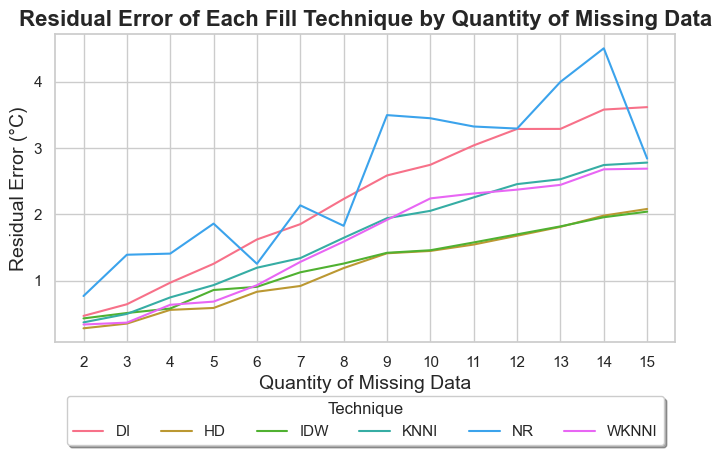

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals_df = pd.read_csv('residuals_results.csv')

# Reemplazo de los nombres de las técnicas
new_names = {
    'Hot_Deck': 'HD',
    'IDW': 'IDW',
    'KNN': 'KNNI',
    'ID': 'DI',
    'Razon_Normal': 'NR',
    'WKNNI': 'WKNNI'
}

residuals_df['Technique'] = residuals_df['Technique'].replace(new_names)

residuals_df['Iteration'] = residuals_df['File'].str.extract(r'_(\d+)\.csv').astype(int)

pivot_df = residuals_df.pivot(index='Iteration', columns='Technique', values='Residual_Error')

# Define el estilo del gráfico
sns.set(style="whitegrid")

# Crea el gráfico de líneas con líneas continuas
plt.figure(figsize=(8, 4))

palette = sns.color_palette("husl", len(pivot_df.columns))

sns.lineplot(data=pivot_df, palette=palette, dashes=False)

# Añade título y etiquetas a los ejes
plt.title('Residual Error of Each Fill Technique by Quantity of Missing Data', fontsize=16, fontweight='bold')
plt.xlabel('Quantity of Missing Data', fontsize=14)
plt.ylabel('Residual Error (°C)', fontsize=14)

# Añade leyenda fuera del gráfico
plt.legend(title='Technique', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(pivot_df.columns))

plt.xticks(ticks=pivot_df.index, labels=pivot_df.index)

# Guarda la imagen en formato .eps
plt.savefig('residuals_plot.eps', format='eps', bbox_inches='tight')

# Muestra el gráfico
plt.show()